<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

Solved by: Davi Moreno

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Tue Aug 19 00:32:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define random seed value
RANDOM_SEED = 42

2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

- Autonomous vehicles: detection of pedestrians, cars, and obstacles
- Security and surveillance: intrusion detection, face recognition
- Medical applications: detection of diseases based on exam images

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

- It is an undesirable machine learning model behavior that deals with the model doing good predictions on the training set but performing bad in the test set.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Data augmentation: increase the dataset with new or artificially created data samples (e.g., by applying transformations to existing data, such as cropping, flipping, or rotating).
- Dropout: turn off random neurons during training so that no particular neuron solely influences the model output.
- Regularization: add a parameter to the cost function that penalizes the model for learning excessively large weights (in magnitude), as this usually results in overfitting.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

- Nice, I did that with the expresso picture shown bellow.

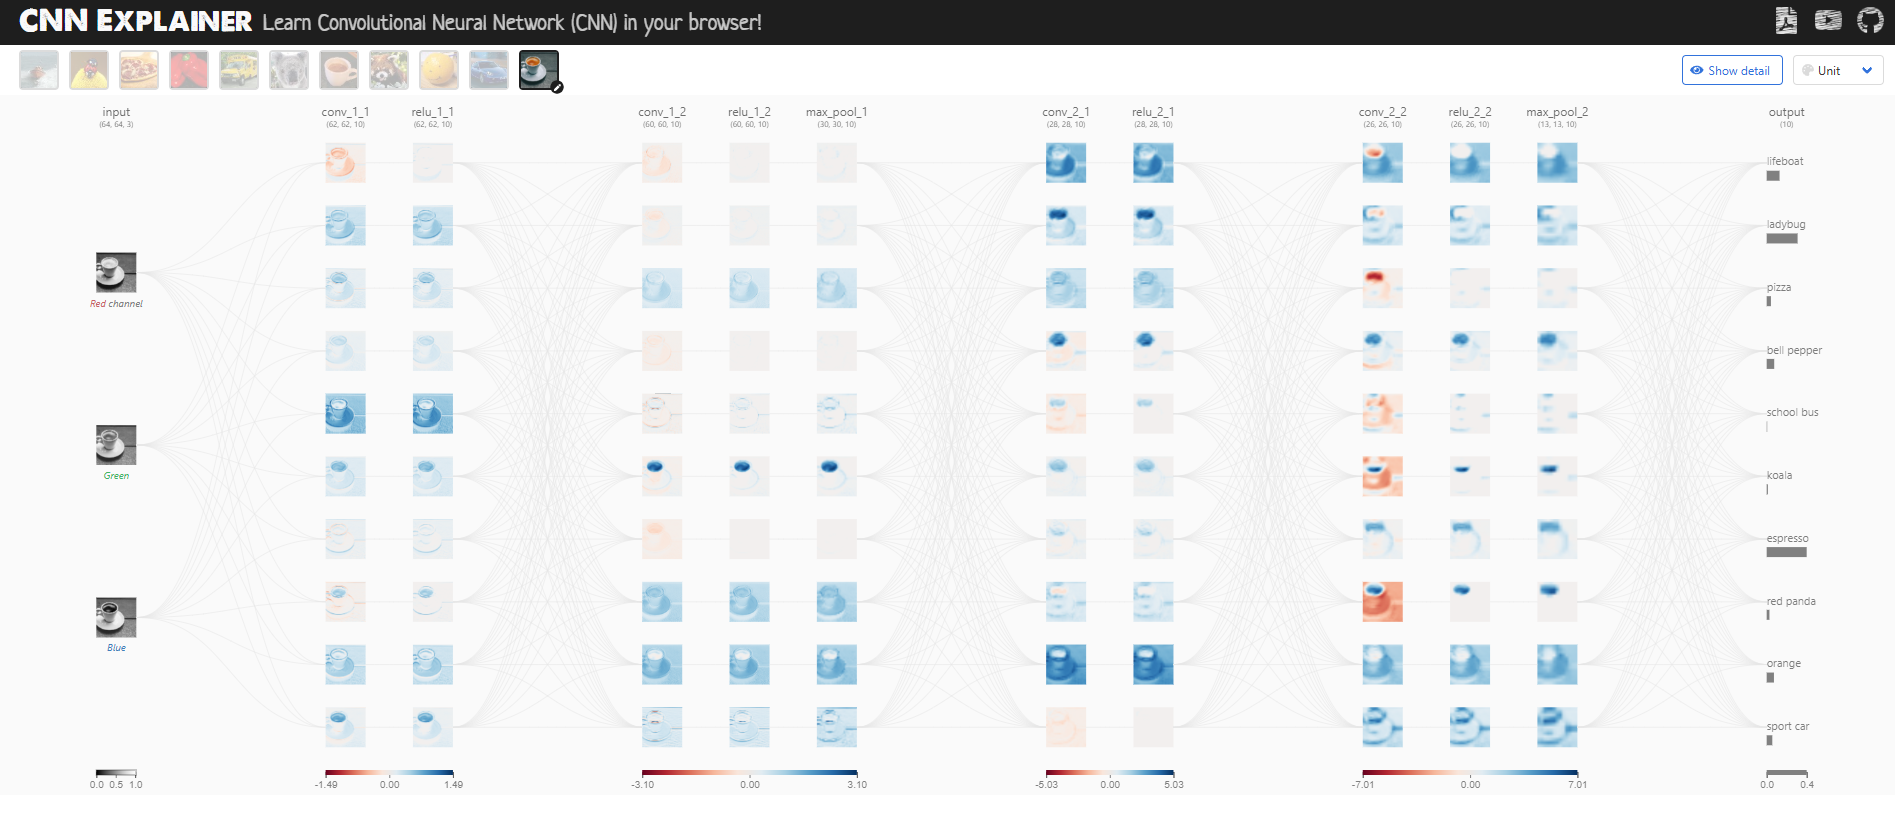

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# torchvision imports
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Imports used for data visualization
import matplotlib.pyplot as plt

In [4]:
# Get MNIST train and test datasets
train_data = datasets.MNIST(root="data",
                            train=True, # get train data
                            download=True,
                            transform=ToTensor())

test_data = datasets.MNIST(root="data",
                           train=False, # get test data
                           download=True,
                           transform=ToTensor())

# Get names for each class
class_names = train_data.classes

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 509kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.70MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.22MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

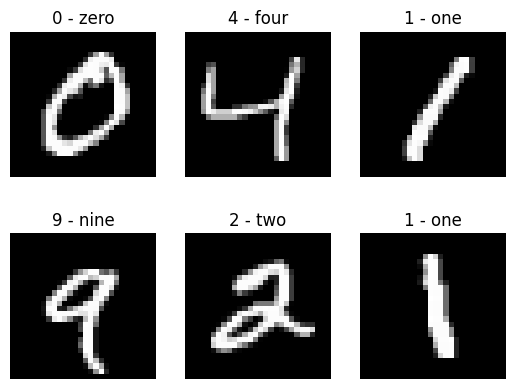

In [5]:
fig = plt.figure()
rows, columns = 2, 3
for i in range(1, rows * columns + 1):
    img, label = train_data[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.squeeze(), cmap="grey")
    plt.title(f"{class_names[label]}")
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
# Import Dataloader
from torch.utils.data import DataLoader

In [7]:
BATCH_SIZE = 32

# Create train dataloader
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

# Create test dataloader
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
import time # to measure training time in different devices
from torch import nn

In [9]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        # Each block above reduces its input image width and length by half.
        # The images in MNIST are 28x28, so the input of this layer will have
        # dimension hidden_units x (28/4) x (28/4), where the hidden units
        # represents the number of output channels of the previous layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.block_2(self.block_1(x)))

torch.manual_seed(RANDOM_SEED)
model_0 = TinyVGG(input_shape=1, # images are greyscale (have only one channel)
                  hidden_units=10,
                  output_shape=len(class_names))
model_0

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
# Define generalized functions to perform model evaluation, training, and
# testing steps.
# A function to print time difference information is also given
# I'm using functions similar to the ones defined in the original lecture

def model_eval(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    model.to(device)
    model.eval()

    eval_loss, eval_acc = 0, 0

    with torch.inference_mode():
        for (X, y) in data_loader:

            # Put data on device
            X = X.to(device)
            y = y.to(device)

            # 1. Forward pass
            y_logits = model(X)

            # 2. Calculate loss and accuracy
            loss = loss_fn(y_logits, y)
            eval_loss += loss
            accuracy = accuracy_fn(y_true=y,
                                   y_pred=y_logits.argmax(dim=1))

        # Adjust metrics
        eval_loss /= len(data_loader)
        eval_acc /= len(data_loader)

        # Return dictionary with information on the evaluation performed
        return {"Accuracy" : eval_acc,
                "Loss"     : eval_loss}

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0, 0

    # Put model on device
    model.to(device)

    # Put model on trainning state
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        # Send batch data to device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_logits = model(X)

        # 2. Compute loss
        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_logits.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Backwards
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Compute loss and accuracy per epoch and print what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0

    model.to(device)

    model.eval() # model in evaluation mode

    with torch.inference_mode():
        for X,y in data_loader:
            # Send data to device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_logits = model(X)

            # 2. Calculate loss and accuracy
            loss = loss_fn(test_logits, y)
            test_loss += loss
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_logits.argmax(dim=1))

        # Adjust metrics and print results
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc: .2f}%\n")

def print_time_difference(start, end, device=None):
    # start and end are given in seconds
    total_time = end - start
    if device:
        print(f"It took {total_time:.3f}s to run this on {device}")
    else:
        print(f"It took {total_time:.3f}s to run this")

In [11]:
# Define loss, optimizer, and accuracy functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

def accuracy_fn(y_true: torch.Tensor,
                y_pred: torch.Tensor) -> float:
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [12]:
EPOCHS = 5

# Training on CPU
device = torch.device("cpu")

start_cpu_time = time.time()

for epoch in range(EPOCHS):
    print(f"-----EPOCH {epoch}-----")

    train_step(model_0,
               train_dataloader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device)

    test_step(model_0,
              test_dataloader,
              loss_fn,
              accuracy_fn,
              device)

end_cpu_time = time.time()

print_time_difference(start_cpu_time, end_cpu_time, device)

-----EPOCH 0-----
Train loss: 0.27735 | Train accuracy: 91.00%
Test loss: 0.07892 | Test accuracy:  97.34%

-----EPOCH 1-----
Train loss: 0.07122 | Train accuracy: 97.76%
Test loss: 0.04805 | Test accuracy:  98.49%

-----EPOCH 2-----
Train loss: 0.05649 | Train accuracy: 98.24%
Test loss: 0.04469 | Test accuracy:  98.50%

-----EPOCH 3-----
Train loss: 0.04700 | Train accuracy: 98.48%
Test loss: 0.04458 | Test accuracy:  98.54%

-----EPOCH 4-----
Train loss: 0.04171 | Train accuracy: 98.66%
Test loss: 0.03978 | Test accuracy:  98.79%

It took 179.706s to run this on cpu


In [13]:
# Redefine model, loss, and optimizer to train the model again but on GPU
torch.manual_seed(RANDOM_SEED)
model_1 = TinyVGG(input_shape=1, # images are greyscale (have only one channel)
                  hidden_units=10,
                  output_shape=len(class_names))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [14]:
# Train on GPU if it is available
if torch.cuda.is_available():
    EPOCHS = 5

    # Training on GPU
    device = torch.device("cuda")

    start_gpu_time = time.time()

    for epoch in range(EPOCHS):
        print(f"-----EPOCH {epoch}-----")

        train_step(model_1,
                train_dataloader,
                loss_fn,
                optimizer,
                accuracy_fn,
                device)

        test_step(model_1,
                test_dataloader,
                loss_fn,
                accuracy_fn,
                device)

    end_gpu_time = time.time()

    print_time_difference(start_gpu_time, end_gpu_time, device)
else:
    print("Sorry, no available GPU")

-----EPOCH 0-----
Train loss: 0.27252 | Train accuracy: 91.19%
Test loss: 0.07990 | Test accuracy:  97.44%

-----EPOCH 1-----
Train loss: 0.07020 | Train accuracy: 97.80%
Test loss: 0.04636 | Test accuracy:  98.49%

-----EPOCH 2-----
Train loss: 0.05584 | Train accuracy: 98.31%
Test loss: 0.04473 | Test accuracy:  98.47%

-----EPOCH 3-----
Train loss: 0.04659 | Train accuracy: 98.55%
Test loss: 0.04401 | Test accuracy:  98.48%

-----EPOCH 4-----
Train loss: 0.04165 | Train accuracy: 98.66%
Test loss: 0.04123 | Test accuracy:  98.69%

It took 61.793s to run this on cuda


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [15]:
# Make predictions on trained model to obtain y_pred for all test samples
model_1.to(device)
model_1.eval()
y_pred = []

with torch.inference_mode():
    for (X,y) in test_dataloader:
        # Put tensors on device
        X = X.to(device)
        y = y.to(device)

        # Forward pass
        y_logits = model_1(X)
        y_pred.append(y_logits.argmax(dim=1).cpu())

y_pred_tensor = torch.cat(y_pred)

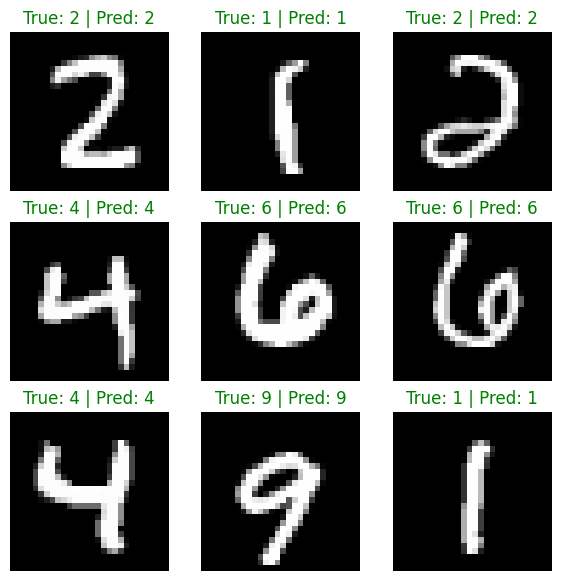

In [16]:
import random

# Set seed
random.seed(RANDOM_SEED)

# Number of images to visualize is (rows * columns)
rows, columns = 3, 3

# Select (rows * columns) random indexes
random_idx = [random.randint(0, len(test_data)) for _ in range(rows * columns)]

# Plot some figures together with its true and predicted labels
fig = plt.figure(figsize=(7, 7))
for i,img_idx in enumerate(random_idx, start=1):
    # print(f"img_idx={img_idx}, pred={y_pred_tensor[img_idx]}")
    img, label = test_data[img_idx]

    fig.add_subplot(rows, columns, i)

    plt.imshow(img.squeeze(), cmap="grey")

    color = "green" if label == y_pred_tensor[img_idx] else "red"
    plt.title(f"True: {label} | Pred: {y_pred_tensor[img_idx]}", color=color)

    plt.axis(False)


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [17]:
# Install needed packets for the confusion matrix if necessary

# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.2 MB/s eta 0:00:00
mlxtend version: 0.23.4


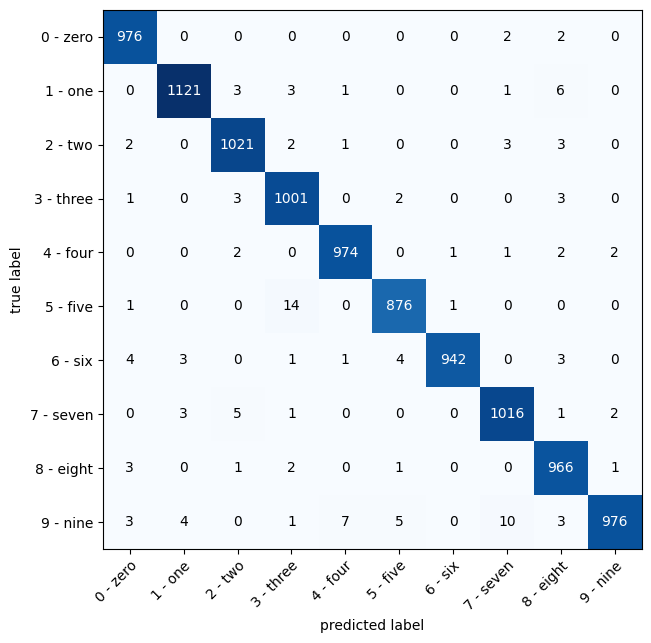

In [18]:
# This cell is the same used in the class to plot the confusion matrix

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [19]:
random_tensor = torch.randn(size=(1, 3, 64, 64))

# Testing a kernel size of 3
kernel_size = 3
conv1 = nn.Conv2d(in_channels=3,
                  out_channels=10,
                  kernel_size=kernel_size)
out_tensor = conv1(random_tensor)
print(f"kernel_size={kernel_size}, out_channels=10 -> out shape={out_tensor.shape}")

# Testing a kernel size of 5
kernel_size = 5
conv1 = nn.Conv2d(in_channels=3,
                  out_channels=10,
                  kernel_size=kernel_size)
out_tensor = conv1(random_tensor)
print(f"kernel_size={kernel_size}, out_channels=10 -> out shape={out_tensor.shape}")

# Testing a kernel size of 7
kernel_size = 7
conv1 = nn.Conv2d(in_channels=3,
                  out_channels=10,
                  kernel_size=kernel_size)
out_tensor = conv1(random_tensor)
print(f"kernel_size={kernel_size}, out_channels=10 -> out shape={out_tensor.shape}")

kernel_size=3, out_channels=10 -> out shape=torch.Size([1, 10, 62, 62])
kernel_size=5, out_channels=10 -> out shape=torch.Size([1, 10, 60, 60])
kernel_size=7, out_channels=10 -> out shape=torch.Size([1, 10, 58, 58])


- We can notice that a higher kernel size results in a lower length and width in the output tensor

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [20]:
# Similarly with what is done in notebook 3, I'll train a TinyVGG in FashionMNIST

# 1. Get FashionMNIST dataset
train_data = datasets.FashionMNIST(root="data",
                                   train=True, # get train data
                                   download=True,
                                   transform=ToTensor())

test_data = datasets.FashionMNIST(root="data",
                                  train=False, # get test data
                                  download=True,
                                  transform=ToTensor())

# Get names for each class
class_names = train_data.classes
class_names

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.79MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 26.2MB/s]


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [21]:
# 2. Create Dataloaders
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [22]:
# 3. Create model, loss function, and optimizer
torch.manual_seed(RANDOM_SEED)

model_2 = TinyVGG(input_shape=1,
                  hidden_units=10,
                  output_shape=len(class_names))

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

In [23]:
# 5. Training

EPOCHS = 5

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

start_time = time.time()

for epoch in range(EPOCHS):
    print(f"-----EPOCH {epoch}-----")

    train_step(model_2,
               train_dataloader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device)

    test_step(model_2,
              test_dataloader,
              loss_fn,
              accuracy_fn,
              device)

end_time = time.time()

print_time_difference(start_time, end_time, device)

-----EPOCH 0-----
Train loss: 0.57946 | Train accuracy: 78.98%
Test loss: 0.39542 | Test accuracy:  85.49%

-----EPOCH 1-----
Train loss: 0.35610 | Train accuracy: 87.18%
Test loss: 0.37687 | Test accuracy:  85.89%

-----EPOCH 2-----
Train loss: 0.31747 | Train accuracy: 88.51%
Test loss: 0.33066 | Test accuracy:  88.13%

-----EPOCH 3-----
Train loss: 0.29457 | Train accuracy: 89.35%
Test loss: 0.31157 | Test accuracy:  88.50%

-----EPOCH 4-----
Train loss: 0.28175 | Train accuracy: 89.71%
Test loss: 0.29793 | Test accuracy:  89.26%

It took 62.234s to run this on cuda


In [24]:
# 6. Get preditions of model on test data

# Make predictions on trained model to obtain y_pred for all test samples
model_2.to(device)
model_2.eval()
y_pred = []

with torch.inference_mode():
    for (X,y) in test_dataloader:
        # Put tensors on device
        X = X.to(device)
        y = y.to(device)

        # Forward pass
        y_logits = model_2(X)
        y_pred.append(y_logits.argmax(dim=1).cpu())

y_pred_tensor = torch.cat(y_pred)

In [25]:
# 7. Get indexes of images that were incorrectly classified

wrong_pred_idx_tensor = torch.where(y_pred_tensor != test_data.targets)[0]

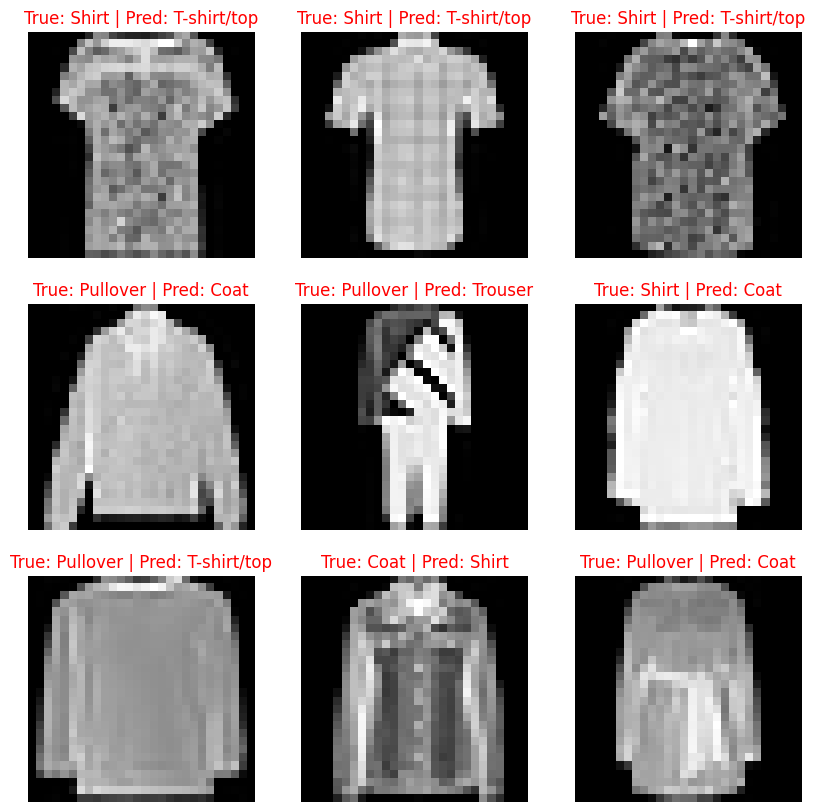

In [26]:
# Plot some predictions were the model was wrong

rows, columns = 3, 3

random_idx = [wrong_pred_idx_tensor[random.randint(0, len(wrong_pred_idx_tensor))] for _ in range(rows * columns)]

fig = plt.figure(figsize=(10, 10))

for i, img_idx in enumerate(random_idx, start=1):
    img, label = test_data[img_idx]

    fig.add_subplot(rows, columns, i)

    plt.imshow(img.squeeze(), cmap="grey")

    plt.title(f"True: {class_names[label]} | Pred: {class_names[y_pred_tensor[img_idx]]}",
              color="red")

    plt.axis(False)

- After analyzing some incorrect predictions, I can say that the model could have performed better. However, its mistakes occur between similar classes that are difficult to distinguish because the images are too blurry.